# Interpretation der HANA - SSBM Benchmark Log Datein

## Settings

Please adjust the following paths according to your environment.

In [1]:
from util import Analyser
LOG_PATH="../../../ssbm/log.log"
analyser = Analyser(LOG_PATH)

## Repetitions

In [2]:
print(analyser.get_repetitions())

250


## Row

In [3]:
benchmark = analyser.get_row_benchmark()
analyser.print_benchmark_stats(benchmark)

Samples,250
Average,8145029.0
Min,7898365
Max,10169894
Median,8121576.0
Standard Deviation,190911.0
Total,2036257355


## Column

In [4]:
benchmark = analyser.get_column_benchmark()
analyser.print_benchmark_stats(benchmark)

Samples,250
Average,953132.0
Min,883485
Max,1607694
Median,945048.0
Standard Deviation,58230.0
Total,238283078


In [5]:
from util import Comparison

column_benchmark = analyser.get_column_benchmark()
row_benchmark = analyser.get_row_benchmark()
comparison = Comparison(column_benchmark, row_benchmark)

comparison.print()

,Column Benchmark,Row Benchmark
Total,238283078,2036257355
Average,953132.0,8145029.0
Median,945048.0,8121576.0
Min,883485,7898365
Max,1607694,10169894
Standard Deviation,58230.0,190911.0
Samples,250,250


In [6]:
column_benchmark = analyser.get_column_benchmark()
queries = column_benchmark.get_all_querynames()
print(list(queries))

['./sql/benchmark/q3_bench/q3.2.sql', './sql/benchmark/q1_bench/q1.sql', './sql/benchmark/q1_bench/q1.1.sql', './sql/benchmark/q1_bench/q1.2.sql', './sql/benchmark/q3_bench/q3.4.sql', './sql/benchmark/q2_bench/q2.sql', './sql/benchmark/q2_bench/q2.1.sql', './sql/benchmark/q3_bench/q3.3.sql', './sql/benchmark/q2_bench/q2.2.sql', './sql/benchmark/q2_bench/q2.3.sql', './sql/benchmark/q4_bench/q4.3.sql', './sql/benchmark/q4_bench/q4.2.sql', './sql/benchmark/q3_bench/q3.sql', './sql/benchmark/q4_bench/q4.sql', './sql/benchmark/q3_bench/q3.1.sql', './sql/benchmark/q4_bench/q4.1.sql', './sql/benchmark/q1_bench/q1.3.sql']


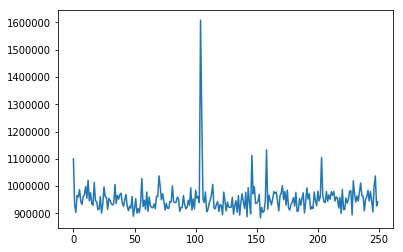

In [7]:
from matplotlib import pyplot as plt, mlab

benchmark = analyser.get_column_benchmark()
plt.plot(benchmark.get_times())
plt.show()